In [9]:
setwd('/home/chenxupeng/projects/exseek')
suppressMessages(library(SingleCellExperiment))
suppressMessages(library(scater))

options(stringsAsFactors = FALSE)

# To Do
- 使用哪两类/多类样本
- 路径
- filter写成函数 外界传入要求
- top k 阈值
- 串起来时变量冲突问题
- batch removal需要log再变回去
- cpm，remove pi、mi，top20，reference gene等方法并入R
- RUVs 用或者不用样本信息
- combat必须用类别信息
- alignment score
- ruvs, combat log and reverse
- scnorm分析图
- ruvs分析图
- 确保输入数据格式没有问题

filename, savename, use which operation, pipeline
- Imputation
    - scImpute
- Normalization
    - CPM
    - Top20
    - Remove pi, miRNA
    - TMM
    - RLE
    - SCNorm
- Batch Removal
    - RUVs: need logged normalization matrix
    - Combat: need logged normalization matrix

# load data

In [13]:
matrix_path = 'data/expression_matrix/scirep_sequential_qc.txt'
classinfo_path = 'data/labels/scirep_classes.txt'

In [ ]:
m <- read.csv(matrix_path, sep='\t',row.names = 1, header=TRUE)

In [18]:
sample_info <-read.csv(classinfo_path)
head(sample_info)

sample_id,label
Sample_1S3,Colorectal Cancer
Sample_1S6,Colorectal Cancer
Sample_1S9,Colorectal Cancer
Sample_1S12,Colorectal Cancer
Sample_1S15,Colorectal Cancer
Sample_1S18,Colorectal Cancer


In [19]:
print (dim(m))
print (dim(sample_info))
head(m)

[1] 89619   191
[1] 191   2


,Sample_1S10,Sample_1S11,Sample_1S12,Sample_1S13,Sample_1S14,Sample_1S15,Sample_1S16,Sample_1S17,Sample_1S18,Sample_1S19,⋯,Sample_PC34,Sample_PC35,Sample_PC36,Sample_PC3,Sample_PC4,Sample_PC5,Sample_PC6,Sample_PC7,Sample_PC8,Sample_PC9
ENST00000473358.1|MIR1302-2HG-202|1544,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000469289.1|MIR1302-2HG-201|843,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000466430.5|AL627309.1-201|31638,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
ENST00000471248.1|AL627309.1-203|18221,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000610542.1|AL627309.1-205|12999,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
ENST00000493797.1|AL627309.2-201|550,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [20]:
reads <- SingleCellExperiment(
    assays = list(counts = as.matrix(m)),
    colData = sample_info )
reads

class: SingleCellExperiment 
dim: 89619 191 
metadata(0):
assays(1): counts
rownames(89619): ENST00000473358.1|MIR1302-2HG-202|1544
  ENST00000469289.1|MIR1302-2HG-201|843 ...
  ENST00000365409.1|Y_RNA.350-201|98
  ENST00000516187.1|Y_RNA.666-201|112
rowData names(0):
colnames(191): Sample_1S10 Sample_1S11 ... Sample_PC8 Sample_PC9
colData names(2): sample_id label
reducedDimNames(0):
spikeNames(0):

# filter lowly expressed reads

In [11]:
thres_count = 2
thres_sample_nums = 5
keep_feature <- rowSums(counts(reads) > thres_count) > thres_sample_nums
reads <- reads[keep_feature, ]
dim(reads)

[1] 7936  191

In [29]:
reads <-  calculateQCMetrics(reads)

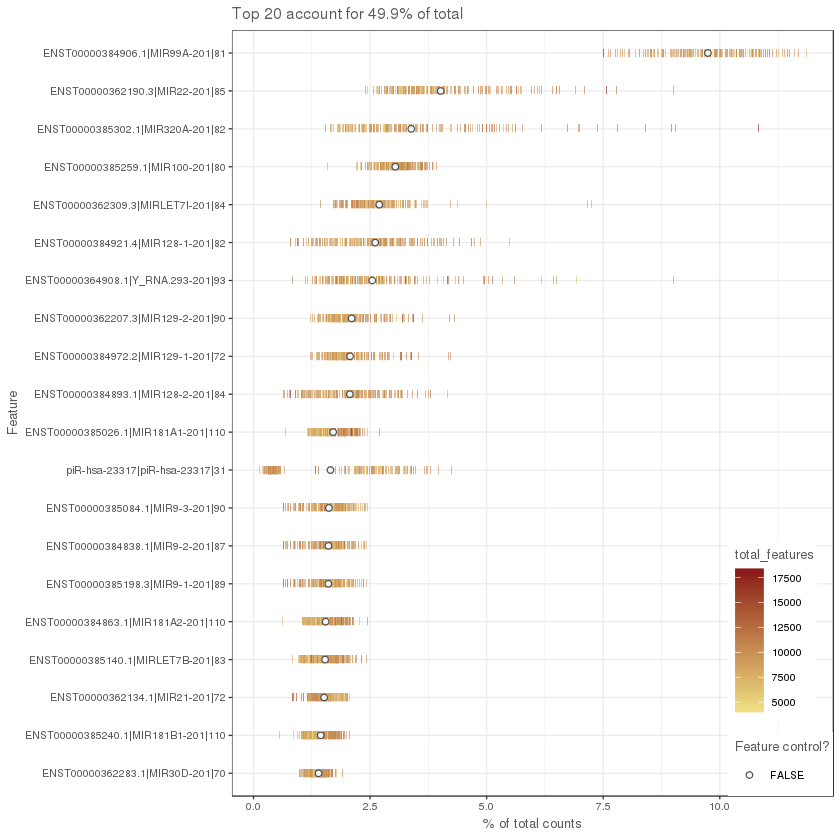

In [31]:
plotHighestExprs(reads,n=20)

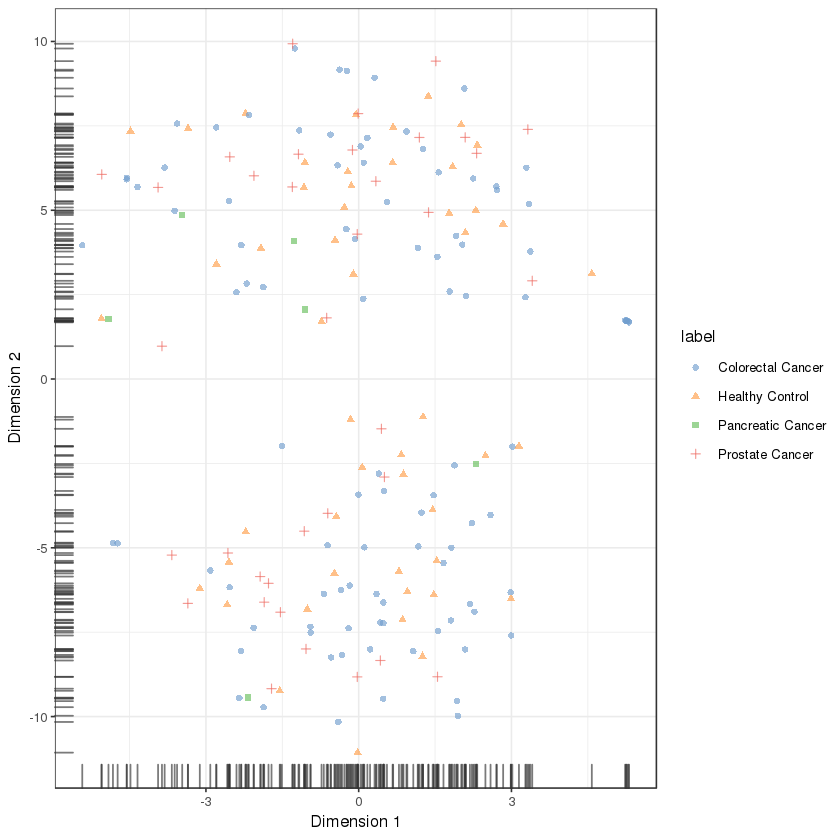

In [26]:
plotTSNE(
    reads,
    exprs_values = "counts",
    shape_by = "label",
    colour_by = "label"
)

# imputation
using scImpute

In [32]:
suppressMessages(library("scImpute"))

In [34]:
sampleLables <- c()
for(i in colnames(reads)){tmp <- as.character(sample_info[which(sample_info$sample_id==i),"label"]); sampleLables <- c(sampleLables,tmp)}

In [37]:
write.csv(counts(reads), "data/expression_matrix/tmpsave.csv")

In [38]:
scimpute(count_path = "data/expression_matrix/tmpsave.csv", infile = "csv", 
         outfile = "txt", out_dir = "data/matrix_processing/imputation/", Kcluster = 5, ncores = 2, labels = as.vector(sampleLables), labeled = TRUE)

[1] "reading in raw count matrix ..."
[1] "number of genes in raw count matrix 89619"
[1] "number of cells in raw count matrix 191"
[1] "estimating dropout probability for type 1 ..."
[1] "imputing dropout values for type 1 ..."
[1] "estimating dropout probability for type 2 ..."
[1] "imputing dropout values for type 2 ..."
[1] "estimating dropout probability for type 3 ..."
[1] "imputing dropout values for type 3 ..."
[1] "estimating dropout probability for type 4 ..."
[1] "imputing dropout values for type 4 ..."
[1] "writing imputed count matrix ..."


integer(0)

# Normalization

## SCnorm

In [39]:
library('SCnorm')

Setting up parallel computation using 4 cores
Gene filter is applied within each condition.
58992 genes in condition 1 will not be included in the normalization due to 
             the specified filter criteria.
A list of these genes can be accessed in output, 
    see vignette for example.
Finding K for Condition 1
Trying K = 1
Trying K = 2
Done!


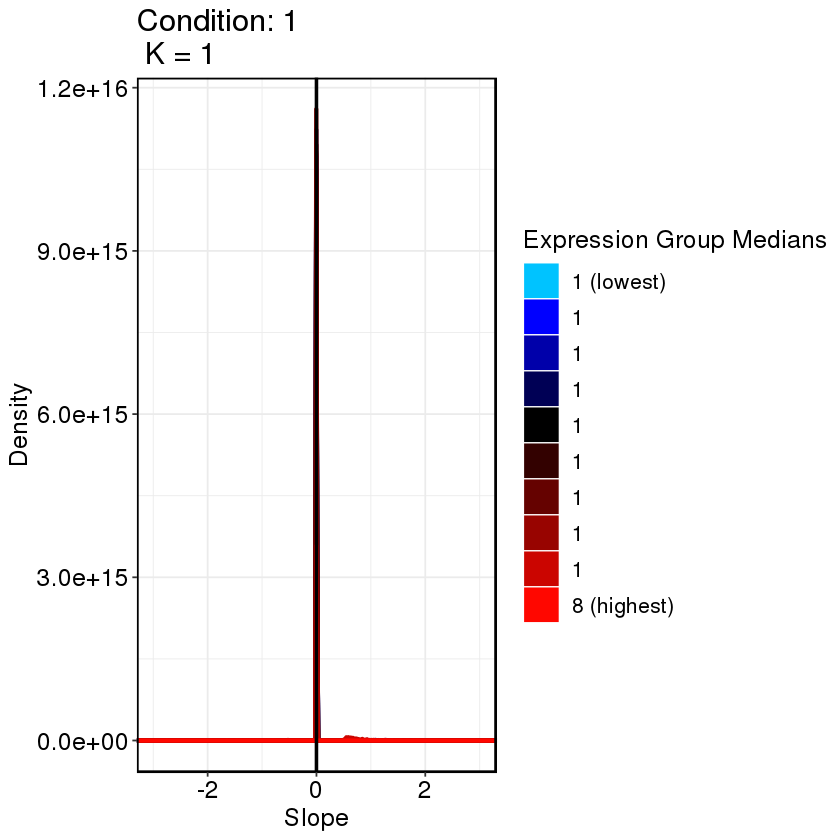

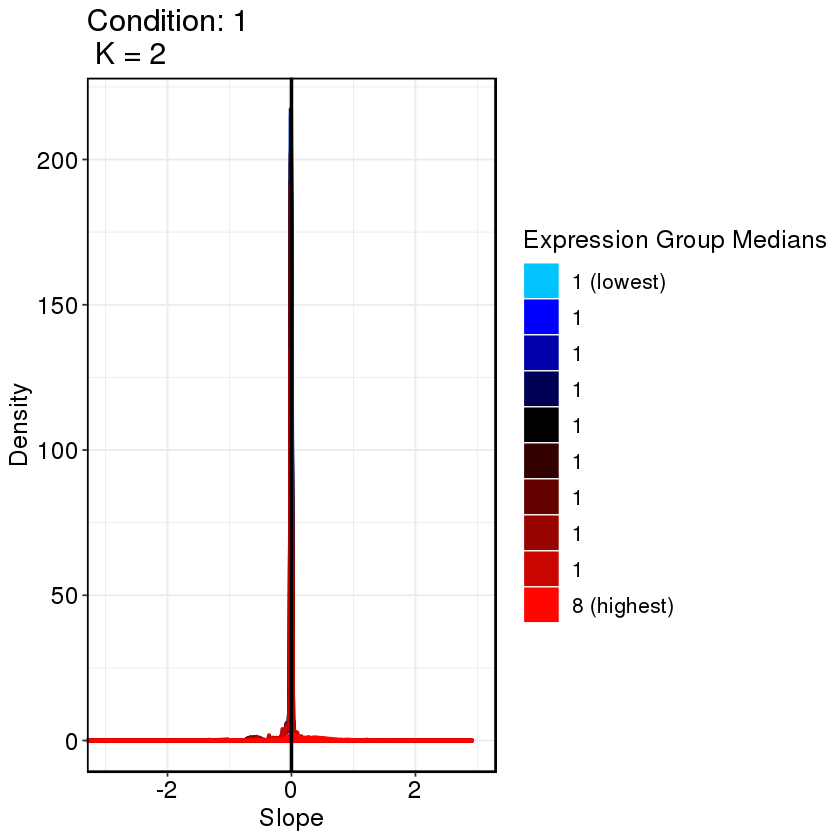

In [40]:
Conditions = rep(1, dim(m)[2])
DataNorm <- SCnorm(Data = m, Conditions = Conditions, PrintProgressPlots = TRUE, NCores = 4)
NormalizedData <- results(DataNorm)

In [41]:
savename = 'data/matrix_processing/normalization/scirep_scnorm.txt'

In [42]:
write.table(NormalizedData, file=savename, sep='\t', quote=FALSE, row.names=TRUE, col.names=TRUE)

## TMM

In [43]:
reads_tmm <- normaliseExprs(reads, method = "TMM")

## normalize the object using the saved size factors
reads_tmm <- normalize(reads_tmm)

In [44]:
savename = 'data/matrix_processing/normalization/scirep_tmm.txt'
write.table(normcounts(reads_tmm), file=savename, sep='\t', quote=FALSE, 
            row.names=TRUE, col.names=TRUE)

## RLE

In [45]:
reads_rle <- normaliseExprs(reads, method = "RLE")

## normalize the object using the saved size factors
reads_rle <- normalize(reads_rle)
savename = 'data/matrix_processing/normalization/scirep_rle.txt'
write.table(normcounts(reads_rle), file=savename, sep='\t', quote=FALSE, 
            row.names=TRUE, col.names=TRUE)

## CPM

## top k as factor

## remove mi and pirna

## reference gene

#  Batch removal

## ruvs

In [46]:
suppressMessages(library(EDASeq))
suppressMessages(library(RUVSeq))
suppressMessages(library(sva))
suppressMessages(library(scRNA.seq.funcs))

- [ ]需要先取log，最后变换回去！！！

In [48]:
# RUVs uses centered (technical) replicate/negative control samples for which the covariates of interest are constant
scIdx <- matrix(-1, ncol = max(table(sample_info$label)), nrow = 2)
tmp <- which(sample_info$label == "Colorectal Cancer")
scIdx[1, 1:length(tmp)] <- tmp
tmp <- which(sample_info$label == "Healthy Control")
#scIdx[2, 1:length(tmp)] <- tmp  #给label信息
scIdx[1, 1:length(tmp)] <- tmp #不给label信息
cIdx <- rownames(m)

In [49]:
ruvs <- RUVs(as.matrix(m), cIdx, k = 10, scIdx = scIdx, isLog = TRUE) #k可调节

In [50]:
savename = 'data/matrix_processing/batch_removal/nolabel.ruvs.scirep.txt'

In [51]:
write.table(ruvs$normalizedCounts, file=savename, sep='\t', quote=FALSE, 
            row.names=TRUE, col.names=TRUE)

## combat

- [ ]多种batch信息的时候分别给出结果

In [54]:
batch_info <-read.csv('data/other_annotations/scirep_batch.txt',sep=',',row.names=1)

In [56]:
head(batch_info)

,RNA.Isolation.batch,library.prepration.day,gel.cut.size.selection
Sample_1S1,2,22,7
Sample_1S2,2,22,8
Sample_1S3,2,22,1
Sample_2S1,2,22,2
Sample_2S2,2,22,3
Sample_2S3,2,22,4


In [60]:
colnames(batch_info)[1]

[1] "RNA.Isolation.batch"

In [79]:
combat_data <- log(m+0.001)
mod_data <- as.data.frame(t(combat_data))
# Basic batch removal
mod0 = model.matrix(~ 1, data = mod_data) 
# Preserve biological variability
mod1 = model.matrix(~ sample_info$label, data = mod_data) 

In [82]:
head(combat_data)

,Sample_1S10,Sample_1S11,Sample_1S12,Sample_1S13,Sample_1S14,Sample_1S15,Sample_1S16,Sample_1S17,Sample_1S18,Sample_1S19,⋯,Sample_PC34,Sample_PC35,Sample_PC36,Sample_PC3,Sample_PC4,Sample_PC5,Sample_PC6,Sample_PC7,Sample_PC8,Sample_PC9
ENST00000473358.1|MIR1302-2HG-202|1544,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,⋯,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.9077552790,-6.907755,-6.907755
ENST00000469289.1|MIR1302-2HG-201|843,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,⋯,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.9077552790,-6.907755,-6.907755
ENST00000466430.5|AL627309.1-201|31638,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,⋯,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,0.0009995003,-6.907755,-6.907755
ENST00000471248.1|AL627309.1-203|18221,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,⋯,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.9077552790,-6.907755,-6.907755
ENST00000610542.1|AL627309.1-205|12999,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,⋯,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.9077552790,-6.907755,-6.907755
ENST00000493797.1|AL627309.2-201|550,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,⋯,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.907755,-6.9077552790,-6.907755,-6.907755


In [81]:
combat <- ComBat(
    dat = t(mod_data), 
    batch = factor(batch_info[,1]), 
    mod = mod1,
    par.prior = TRUE,
    prior.plots = FALSE
)

Found9batches
Adjusting for3covariate(s) or covariate level(s)


Standardizing Data across genes


Fitting L/S model and finding priors
Finding parametric adjustments
Adjusting the Data



In [84]:
head(exp(combat))

,Sample_1S10,Sample_1S11,Sample_1S12,Sample_1S13,Sample_1S14,Sample_1S15,Sample_1S16,Sample_1S17,Sample_1S18,Sample_1S19,⋯,Sample_PC34,Sample_PC35,Sample_PC36,Sample_PC3,Sample_PC4,Sample_PC5,Sample_PC6,Sample_PC7,Sample_PC8,Sample_PC9
ENST00000473358.1|MIR1302-2HG-202|1544,0.0009924928,0.0009924928,0.0009924928,0.0009924928,0.0009924928,0.0009924928,0.0009924928,0.0009924928,0.0009924928,0.0009924928,⋯,0.0009106956,0.0009106956,0.0009106956,0.0009106956,0.0010341772,0.0010934655,0.0010934655,0.0011834709,0.0010557588,0.0010557588
ENST00000469289.1|MIR1302-2HG-201|843,0.0009808256,0.0009808256,0.0009808256,0.0009808256,0.0009808256,0.0009808256,0.0009808256,0.0009808256,0.0009808256,0.0009808256,⋯,0.0012142331,0.0012142331,0.0012142331,0.0012142331,0.0012599971,0.0009780358,0.0009780358,0.0006863939,0.0008193854,0.0008193854
ENST00000466430.5|AL627309.1-201|31638,0.0009771850,0.0009771850,0.0009771850,0.0009771850,0.0009771850,0.0009771850,0.0009771850,0.0009771850,0.0009771850,0.0009771850,⋯,0.0011827683,0.0011827683,0.0011827683,0.0011827683,0.0017855205,0.0009714285,0.0009714285,0.4384344807,0.0010287241,0.0010287241
ENST00000471248.1|AL627309.1-203|18221,0.0010235696,0.0010235696,0.0010235696,0.0010235696,0.0010235696,0.0010235696,0.0010235696,0.0010235696,0.0010235696,0.0010235696,⋯,0.0006999912,0.0006999912,0.0006999912,0.0006999912,0.0010019199,0.0009638483,0.0009638483,0.0009752780,0.0009109887,0.0009109887
ENST00000610542.1|AL627309.1-205|12999,0.0011489941,0.0011489941,0.0011489941,0.0011489941,0.0011489941,0.0011489941,0.0011489941,0.0011489941,0.0011489941,0.0011489941,⋯,0.0012085590,0.0012085590,0.0012085590,0.0012085590,0.0008420004,0.0009060959,0.0009060959,0.0009754878,0.0011494956,0.0011494956
ENST00000493797.1|AL627309.2-201|550,0.0010209531,0.0010209531,0.0010209531,0.0010209531,0.0010209531,0.0010209531,0.0010209531,0.0010209531,0.0010209531,0.0010209531,⋯,0.0013009322,0.0013009322,0.0013009322,0.0013009322,0.0012206261,0.0009318993,0.0009318993,0.0006435806,0.0008267357,0.0008267357


In [87]:
savename = 'data/matrix_processing/batch_removal/combat.batch_1.txt'
write.table(exp(combat), file=savename, sep='\t', quote=FALSE, 
            row.names=TRUE, col.names=TRUE)